In [1]:
import pickle
import functions as ft

First thing, we create a Graph based on the given data. Such data consist in Wikipedia pages belonging to Categories that have between 5000 and 30000 articles each. From now on, we will treat each article as a node in our Graph.

In [2]:
G = ft.generate_graph()

We now want to map each node in our Graph to its corresponding category. For this purpose, we create a dictionary called "cleaned_dict". The only nodes we consider are the ones from the file "wikigraph_reduced.csv".

In [3]:
# cleaned_dict = ft.inverted_dictionary(G)

# with open("cleaned_dict.pkl", "wb") as f:
#     pickle.dump(cleaned_dict,f)

Since we break ties randomly between nodes that belong to different categories, we keep using the same dictionary saved as a Pickle variable

In [4]:
with open("cleaned_dict.pkl", "rb") as f:
    cleaned_dict = pickle.load(f)

As an additional resource, we create a second dictionary where we group all nodes according to the each Category.

In [5]:
category_dict = ft.category_dict(cleaned_dict)

## Question 1

- Is the Graph directed?

The Graph is obsviously directed, as it is just a representation of a small Wikipedia subgraph. Webpages are intrinsecally directed to each other, as there is no guarantee that, when leaving a page, we will find a link that will bring us back to the page we just left.
However, for the sake of completeness, we are also going to prove it by checking whether there are at least two nodes in our Graph that are not both connected to each other.

In [6]:
ft.check_if_is_direct(G)

True

- How many articles are we considering?

We make use of the networkx "number_of_nodes" method to get the number of articles in the Graph

In [7]:
ft.get_articles(G)

98343

- How many hyperlinks between pages exist?

We make use of the networkx "number_of_edges" method to get the number of hyperlinks in all the articles

In [8]:
ft.get_hyperlinks(G)

483094

- Compute the average number of links in an arbitrary page. What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?

We can say that a graph is dense if the number of edges is close to the maximum number of edges it can possibly have. 
<br>
The Density of a graph can be defined as: 
${\displaystyle D={\frac {|E|}{2\binom {|V|}{2}}}={\frac {|E|}{|V|(|V|-1)}}}$

In [9]:
n = ft.get_articles(G)
m = ft.get_hyperlinks(G)

density = (m)/(n*(n-1))

print(density)

4.9951571365597335e-05


We got a density value equal to 4.9951571365597335e-05. Considering that the maximum possible density of a graph is 1, it is easily observable that there is a huge discrepancy between the maximum value and the actual density that we have found. Therefore we conclude that the observed graph is sparse.

- Visualize the nodes' degree distribution

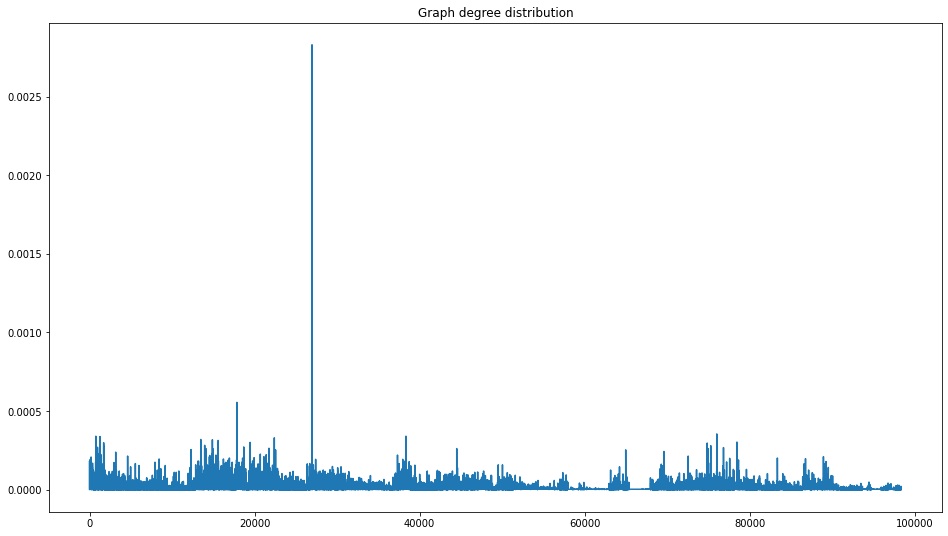

In [10]:
ft.plot_our_graph(G)

## Question 2

Here we define a function that takes as input the integer corresponding to an arbitrary node and a given number of clicks, and returns the set of all the pages we can visit within that number of clicks.

In [11]:
ft.path_within_clicks(G, 95, 2) # 95 is the chosen node, 2 is the number of clicks

{150451, 1062563, 1178930, 1184017, 1184695, 1185516, 1761109}

## Question 3

Propedeutically to the implementation of our algorithm, we need a dictionary mapping each node to its out-degree. We name it "degree_dict"

In [12]:
degree_dict = ft.get_degree_dict(G)

The function we have developed below makes use of the Breadth First Search algorithm

In [13]:
ft.bfs(G, category_dict, degree_dict)

Insert the category: English_football_managers
Insert pages separated by a blank space: 76871 74988 83096
Not possible


64010

Turns out it is not possible to reach all the nodes in input.

## Question 4

As per our homework requirement, we first create a subgraph out of two given Categories:

In [14]:
H = ft.create_subGraph(G, category_dict)

Insert First Category: Living_people
Insert Second Category: People_from_Boston,_Massachusetts


Now that we have the desired subgraph, we use the min cut algorithm to find all the possible paths between two given nodes.

In [15]:
ft.min_cut(H, 82909, 85125)

Found
[82909, 85125]
1
Found
2


2

According to our result, 2 is the minimum number of links that needs to be removed so that the given two nodes end up being disconnected

## Question 5

To find the shortest paths between each Category and the one in input, we make use of the breadth first search algorithm. We calculate the distance between each node of the given Category and all the other nodes from the other Categories, and store them in a dictionary that associates each Category to a list of all the shortest paths between its nodes and the ones from all the other Categories.
Once the dictionary is ready, we compute the median for each category, and sort the result according to each distance, from the furthest to the closest.

In [16]:
shortest_paths = ft.get_shortest_paths(G, category_dict, cleaned_dict)

Insert a Category: Ojibwe_people


Here we return a sample with the 10 most distant categories from the one in input. 

In [17]:
shortest_paths[:10]

['Lille_OSC_players',
 'NK_Maribor_players',
 'Hong_Kong_First_Division_League_players',
 'Brescia_Calcio_players',
 'A.C._Arezzo_players',
 'A.S._Varese_1910_players',
 'Expatriate_footballers_in_Hong_Kong',
 'Calcio_Padova_players',
 'V2_Records_albums',
 'Jazz_fusion_albums']

## Question 6

Since the assignment is asking to model a network of Categories, we create a new graph called "Z", where we concentrate all nodes from each category into a "supernode" that keeps all the edges from its original nodes.

In [18]:
Z = ft.model_network(G, category_dict)

Our approach is to represent Z as a matrix. Given that there is a lot of variation between the integers representing each node of the Graph, we "map" each integer to a number in the range from 0 to the total number of supernodes in Z. Such approach also let us finding back the original integer representing the node. For this purpose, we create the two dictionaries below: the first one is to go from the original integer to the index of the matrix, the second one to find back the original value identifying the node of Z (which corresponds to a specific Category).

In [19]:
category_map_int, inv_category_map = ft.get_mapping_dict(Z)

Now we are ready to implement our PageRank algorithm and calculate all the pageranks for each category out of the google matrix. The output is sorted according to the pageranks.

In [20]:
page_rank = ft.pagerank(Z, category_map_int, inv_category_map, cleaned_dict)
head = ft.get_pagerank_head(page_rank, 20)

For visual simplicity, we show the first 20 categories that has the highest pagerank score.

In [21]:
head

,Category,PageRank
1,Living_people,0.013163
2,English-language_films,0.005639
3,American_film_actors,0.005339
4,American_television_actors,0.004582
5,American_films,0.004421
6,Harvard_University_alumni,0.004326
7,Year_of_birth_missing,0.003668
8,English_footballers,0.003194
9,Year_of_death_missing,0.003182
10,Association_football_midfielders,0.003097


Eventually, we plot such top 20 categories and their pageranks in the form of a histogram

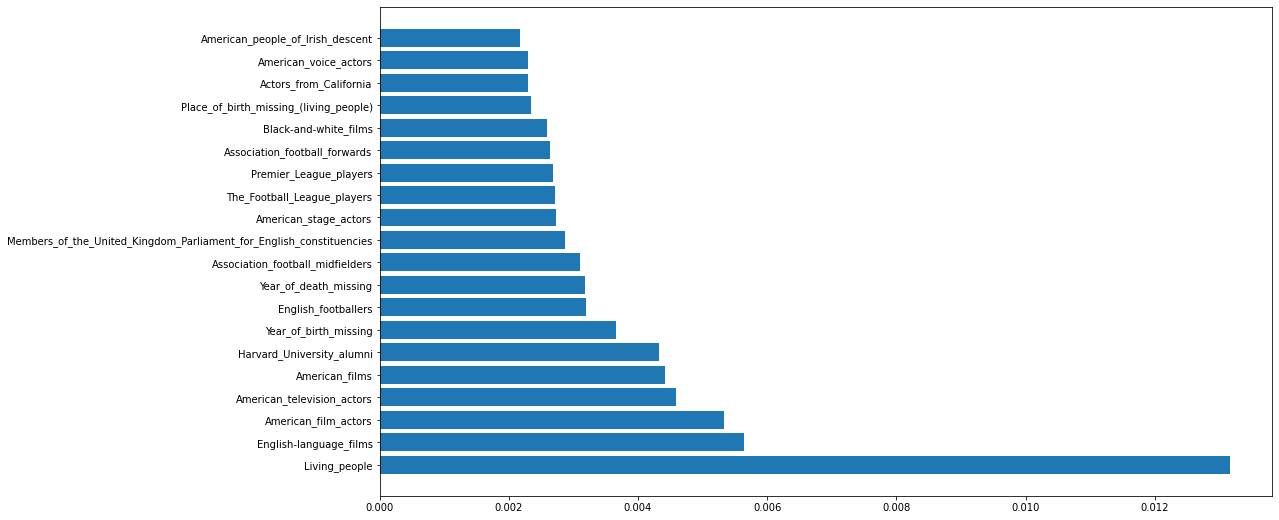

In [22]:
ft.plot_pagerank(head)